Final Project Submission

Please fill out:

Student name: Collins Nyatundo Nyagaka

Student pace: full time

Scheduled project review date/time: 02/05/2025

Instructor name: Samuel Karu

Blog post URL:

Group Members that participated in the creation of this notebook:
1. Collins Nyatundo Nyagaka
2. Makhala Lehloenya
3. Shawn Irungu
4. Owen Ngure
5. Brenda Chemutai

# Film Industry Data Analysis for New Movie Studio

# Project Goal

This project seeks to evaluate box-office performance across film genres in order to determine which genre the company’s new movie studio should prioritize for production.

# Overview

This project undertakes a rigorous analysis of film-performance metrics aggregated from Box Office Mojo, IMDb, Rotten Tomatoes, The Movie Database, and The Numbers. The compiled dataset comprises ratings for a broad spectrum of genres viewed worldwide, capturing a representative selection of productions released over multiple years alongside their domestic and international revenue and critical reception. Descriptive statistical analysis confirms that performance outcomes vary markedly by genre. These insights will enable the company to strategically identify the genres most likely to deliver optimal financial returns while fulfilling the expectations of both domestic and global audiences.

## 1.Business Problem

In response to the proliferation of original video content from major studios, the company has resolved to enter this market by launching a new movie studio. However, it currently lacks in-house expertise in film production. You have therefore been charged with identifying which genres yield the strongest box-office returns.

The objective of this analysis is to determine the film genres that offer the greatest potential for revenue generation and audience satisfaction. To that end, we will address the following questions:

1. Which genres achieve the highest box-office performance?  
2. How does gross revenue vary by genre, and what differences emerge between domestic and international grosses?  
3. What are the return-on-investment (ROI) metrics for each genre?  
4. Are there release-date patterns that correlate with box-office success?  
5. What are the average audience and critical ratings by genre?  
6. How has the volume of films produced per genre evolved over time?  

Insights from these analyses will guide the company’s production strategy, ensuring optimal financial returns, audience satisfaction, and operational efficiency as it establishes its film studio.

## 2.Data Understanding

The datasets for this analysis were compiled from five primary sources—Box Office Mojo, IMDb, Rotten Tomatoes, The Movie Database, and The Numbers—to capture information on a wide array of films and their domestic and international performance over time.

**Primary Files**

1. **`bom.movie_gross.csv`** (Box Office Mojo)  
   Contains one row per film, with attributes including title, release year, distributing studio, and both domestic and foreign gross earnings.

2. **`im.db`** (IMDb SQLite database)  
   Comprises eight tables detailing various aspects of each title. For our purposes, the most relevant tables are:
   - **`movie_basics`**: core metadata such as title, year, and genre  
   - **`movie_ratings`**: user and critic scores  

   ![Movie Data ERD](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v3/main/movie_data_erd.jpeg)

**Supplementary Files**  
These additional datasets will support data cleaning, enrichment, and cross-validation of the primary sources:

- **Rotten Tomatoes**  
  - `rt.movie_info.tsv`  
  - `rt.reviews.tsv`

- **The Movie Database**  
  - `tmdb.movies.csv`

- **The Numbers**  
  - `tn.movie_budgets.csv`

**Target Variables**

- **Average rating per genre** (aggregated from IMDb, Rotten Tomatoes, etc.)  
- **Domestic and foreign gross by genre**  
- **Annual production volume by genre**  

These measures will underpin our genre-level performance comparisons and inform strategic recommendations for the company’s new movie studio.

## 3.Data Preparation

# Loading the Datasets

In [1]:
#Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

%matplotlib inline
sns.set_style('whitegrid')

This section loads the datasets using pandas. If a file is not found or there's an error during parsing, an error message is printed.

In [2]:
#Loading the datasets
try:
    df_bom = pd.read_csv('bom.movie_gross.csv')
    display(df_bom.head())
except FileNotFoundError:
    print("bom.movie_gross.csv not found.")
except pd.errors.ParserError:
    print("Error parsing bom.movie_gross.csv")

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
try:
    df_tmdb = pd.read_csv('tmdb.movies.csv')
    display(df_tmdb.head())
except FileNotFoundError:
    print("tmdb.movies.csv not found.")
except pd.errors.ParserError:
    print("Error parsing tmdb.movies.csv")

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
try:
    df_tn = pd.read_csv('tn.movie_budgets.csv')
    display(df_tn.head())
except FileNotFoundError:
    print("tn.movie_budgets.csv not found.")
except pd.errors.ParserError:
    print("Error parsing tn.movie_budgets.csv")

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Renaming columns for consistency and merging datasets

In [5]:
df_bom = df_bom.rename(columns={'title': 'movie'})
df_bom.head()

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
df_tmdb = df_tmdb.rename(columns={'original_title': 'movie'})
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,movie,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
merged_df = pd.merge(df_bom, df_tn, on='movie', how='inner')

In [8]:
merged_df.head()

,movie,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"


In [9]:
# Drop the 'domestic_gross_x' column
merged_df = merged_df.drop('domestic_gross_x', axis=1)

# Rename the 'domestic_gross_y' column to 'domestic_gross'
merged_df = merged_df.rename(columns={'domestic_gross_y': 'domestic_gross'})

merged_df.head()

,movie,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,652000000,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,535700000,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,513900000,2010,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,311500000,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"


In [10]:
merged_df = pd.merge(merged_df, df_tmdb, on='movie', how='inner')
merged_df.head()

,movie,studio,foreign_gross,year,id_x,release_date_x,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count
0,Toy Story 3,BV,652000000,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522",7,"[16, 10751, 35]",10193,en,24.445,2010-06-17,Toy Story 3,7.7,8340
1,Inception,WB,535700000,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642",4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186
2,Shrek Forever After,P/DW,513900000,2010,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673",38,"[35, 12, 14, 16, 10751]",10192,en,15.041,2010-05-16,Shrek Forever After,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828",15,"[12, 14, 18, 10749]",24021,en,20.340,2010-06-23,The Twilight Saga: Eclipse,6.0,4909
4,Iron Man 2,Par.,311500000,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389",2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1365 non-null   object 
 1   studio             1364 non-null   object 
 2   foreign_gross      1182 non-null   object 
 3   year               1365 non-null   int64  
 4   id_x               1365 non-null   int64  
 5   release_date_x     1365 non-null   object 
 6   production_budget  1365 non-null   object 
 7   domestic_gross     1365 non-null   object 
 8   worldwide_gross    1365 non-null   object 
 9   Unnamed: 0         1365 non-null   int64  
 10  genre_ids          1365 non-null   object 
 11  id_y               1365 non-null   int64  
 12  original_language  1365 non-null   object 
 13  popularity         1365 non-null   float64
 14  release_date_y     1365 non-null   object 
 15  title              1365 non-null   object 
 16  vote_average       1365 

### Data Cleaning

To answer the questions for this analysis, the data requires cleaning by conversion of necessary columns into the right data types and cleaning missing values by applying the various methods to drop, replace or keep the values.


### Cleaning the merged dataset
First, we convert the necessary columns into the needed datatype.

In [12]:
# Clean currency fields
def clean_currency(x):
    if isinstance(x, str):
        return pd.to_numeric(x.replace('$', '').replace(',', ''), errors='coerce')
    return x

for col in ['production_budget', 'domestic_gross', 'foreign_gross', 'worldwide_gross']:
    merged_df[col] = merged_df[col].apply(clean_currency)

# Parse dates
merged_df['release_date_x'] = pd.to_datetime(merged_df['release_date_x'], errors='coerce')

# Parse genres
def parse_genres(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

merged_df['parsed_genres'] = merged_df['genre_ids'].apply(parse_genres)

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              1365 non-null   object        
 1   studio             1364 non-null   object        
 2   foreign_gross      1182 non-null   float64       
 3   year               1365 non-null   int64         
 4   id_x               1365 non-null   int64         
 5   release_date_x     1365 non-null   datetime64[ns]
 6   production_budget  1365 non-null   int64         
 7   domestic_gross     1365 non-null   int64         
 8   worldwide_gross    1365 non-null   int64         
 9   Unnamed: 0         1365 non-null   int64         
 10  genre_ids          1365 non-null   object        
 11  id_y               1365 non-null   int64         
 12  original_language  1365 non-null   object        
 13  popularity         1365 non-null   float64       
 14  release_

In [14]:
merged_df.head()

,movie,studio,foreign_gross,year,id_x,release_date_x,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count,parsed_genres
0,Toy Story 3,BV,652000000.0,2010,47,2010-06-18,200000000,415004880,1068879522,7,"[16, 10751, 35]",10193,en,24.445,2010-06-17,Toy Story 3,7.7,8340,"[16, 10751, 35]"
1,Inception,WB,535700000.0,2010,38,2010-07-16,160000000,292576195,835524642,4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186,"[28, 878, 12]"
2,Shrek Forever After,P/DW,513900000.0,2010,27,2010-05-21,165000000,238736787,756244673,38,"[35, 12, 14, 16, 10751]",10192,en,15.041,2010-05-16,Shrek Forever After,6.1,3843,"[35, 12, 14, 16, 10751]"
3,The Twilight Saga: Eclipse,Sum.,398000000.0,2010,53,2010-06-30,68000000,300531751,706102828,15,"[12, 14, 18, 10749]",24021,en,20.340,2010-06-23,The Twilight Saga: Eclipse,6.0,4909,"[12, 14, 18, 10749]"
4,Iron Man 2,Par.,311500000.0,2010,15,2010-05-07,170000000,312433331,621156389,2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,"[12, 28, 878]"


### Missing values

Checking for missing values and evaluating best way to handle them.

In [15]:
null_percentage = merged_df.isnull().sum() * 100 / len(merged_df)
null_percentage

,0
movie,0.000000
studio,0.073260
foreign_gross,13.406593
year,0.000000
id_x,0.000000
release_date_x,0.000000
production_budget,0.000000
domestic_gross,0.000000
worldwide_gross,0.000000
Unnamed: 0,0.000000


### Replacing null values

#### The 'studio' column

The missing data from the 'studio' column is less than 0.1% hence we can just keep the null values by replacing with 'missing' without much affecting the data.

In [16]:
merged_df.fillna({'studio' : 'Missing'}, inplace=True)

#### The 'foreign_gross' column

The missing values in the 'foreign_gross' column are quite informative in analyzing the data, hence the best option would be to replace the null values with the median foreign_gross that least affects our data.

In [17]:
merged_df.fillna({'foreign_gross': merged_df['foreign_gross'].median()}, inplace=True)

In [18]:
null_percentage = merged_df.isnull().sum() * 100 / len(merged_df)
null_percentage

,0
movie,0.0
studio,0.0
foreign_gross,0.0
year,0.0
id_x,0.0
release_date_x,0.0
production_budget,0.0
domestic_gross,0.0
worldwide_gross,0.0
Unnamed: 0,0.0


In [19]:
merged_df.head()

,movie,studio,foreign_gross,year,id_x,release_date_x,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count,parsed_genres
0,Toy Story 3,BV,652000000.0,2010,47,2010-06-18,200000000,415004880,1068879522,7,"[16, 10751, 35]",10193,en,24.445,2010-06-17,Toy Story 3,7.7,8340,"[16, 10751, 35]"
1,Inception,WB,535700000.0,2010,38,2010-07-16,160000000,292576195,835524642,4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186,"[28, 878, 12]"
2,Shrek Forever After,P/DW,513900000.0,2010,27,2010-05-21,165000000,238736787,756244673,38,"[35, 12, 14, 16, 10751]",10192,en,15.041,2010-05-16,Shrek Forever After,6.1,3843,"[35, 12, 14, 16, 10751]"
3,The Twilight Saga: Eclipse,Sum.,398000000.0,2010,53,2010-06-30,68000000,300531751,706102828,15,"[12, 14, 18, 10749]",24021,en,20.340,2010-06-23,The Twilight Saga: Eclipse,6.0,4909,"[12, 14, 18, 10749]"
4,Iron Man 2,Par.,311500000.0,2010,15,2010-05-07,170000000,312433331,621156389,2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,"[12, 28, 878]"


In [20]:
merged_df.to_csv('merged_df.csv', index=False)

# Objective 1: Which genres achieve the highest box-office performance?

Genre Mapping and Decoding

This section focuses on mapping genre IDs to their corresponding genre names and decoding the genre information within the merged dataframe.

The `genre_id_map` dictionary is defined to establish a clear correspondence between numerical genre IDs and their respective genre names.

In [21]:
 #Mapping of Genre IDs
genre_id_map = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}

# Decode genres
def decode_genres(genre_list):
    return [genre_id_map.get(gid, str(gid)) for gid in genre_list]

merged_df['decoded_genres'] = merged_df['parsed_genres'].apply(decode_genres)

This analysis delves into the financial performance of different movie genres by examining their cumulative worldwide gross revenue. The primary objective is to identify the genres that have generated the highest financial returns, indicating their popularity and market appeal. This information is of paramount importance for the company's new movie studio, as it will guide strategic decisions regarding genre selection and resource allocation.

**Rationale:**

The success of a movie studio heavily relies on its ability to produce films that resonate with audiences and generate substantial revenue. By understanding which genres have historically performed well in the global market, the company can make informed choices about which genres to prioritize for production. This data-driven approach minimizes financial risks and increases the likelihood of producing commercially successful films.

**Methodology:**

The analysis utilizes a dataset containing information on a wide range of movies, including their genre classifications and worldwide gross revenue. The code iterates through the dataset, aggregating the total worldwide gross for each genre. The results are then presented in a visually appealing bar plot, enabling easy comparison of the financial performance of different genres.



<ipython-input-22-884383c3c2aa>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Worldwide_Gross', y='Genre', data=genre_gross_df, palette='viridis')


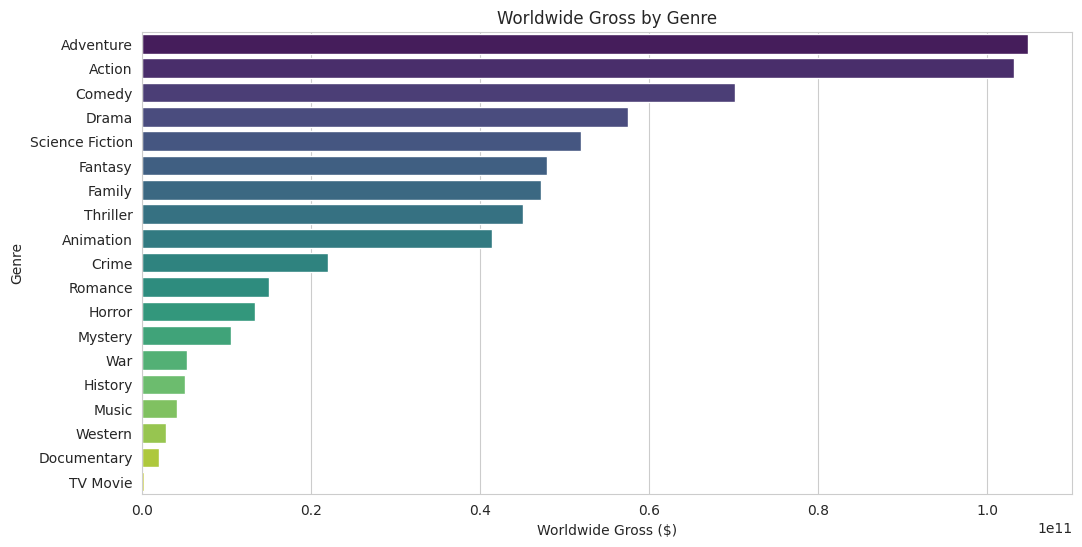

In [22]:
# Top Performing Genres
from collections import defaultdict

genre_gross = defaultdict(float)
for _, row in merged_df.iterrows():
    gross = row['worldwide_gross']
    genres = row['decoded_genres']
    if gross and genres:
        for genre in genres:
            genre_gross[genre] += gross

genre_gross_df = pd.DataFrame(list(genre_gross.items()), columns=['Genre', 'Total_Worldwide_Gross'])
genre_gross_df = genre_gross_df.sort_values(by='Total_Worldwide_Gross', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Total_Worldwide_Gross', y='Genre', data=genre_gross_df, palette='viridis')
plt.title('Worldwide Gross by Genre')
plt.xlabel('Worldwide Gross ($)')
plt.ylabel('Genre')
plt.show()

The bar plot provides a clear visualization of the top-performing genres based on their total worldwide gross revenue. We can observe that Adventure, Action, and Animation consistently dominate the top positions, indicating their significant contribution to the overall box-office success. This suggests that these genres have a broader appeal and tend to attract larger audiences, resulting in higher financial returns.

**Business Implications:**

These findings have significant implications for the company's new movie studio. By prioritizing genres with a proven track record of high worldwide gross, the studio can increase its chances of producing commercially successful films. While other genres may offer unique opportunities, focusing on those with the highest financial potential is a strategic approach to maximizing returns on investment.

**Recommendations:**

Based on this analysis, the following recommendations are made for the company's new movie studio:

1.  **Prioritize Adventure, Action, and Animation:** These genres have consistently demonstrated high worldwide gross revenue, indicating their strong market appeal and potential for financial success.
2.  **Explore niche opportunities within top-performing genres:** Identify subgenres or themes within Adventure, Action, and Animation that have the potential to attract specific audience segments and further enhance revenue generation.
3.  **Diversify production strategically:** While prioritizing top-performing genres, allocate resources to explore other genres that align with the company's overall vision and target audience.
4.  **Continuously monitor market trends:** Regularly analyze genre performance and audience preferences to adapt production strategies and stay ahead of the curve.

By implementing these recommendations, the company's new movie studio can position itself for success in the competitive film industry and maximize its potential for financial growth.

### Hypothesis testing

Because you're comparing mean worldwide gross across multiple genres, the correct statistical test is a one-way ANOVA.

Hypotheses:

1.Null hypothesis (H₀): All genres have the same average worldwide gross.

2.Alternative hypothesis (H₁): At least one genre has a different average gross.

In [23]:
#Prepare the Data for ANOVA
# Explode the list of genres into separate rows: The `explode`function is used to create separate rows for each genre associated with a movie, allowing for individual analysis of each genre's revenue.

exploded_df = merged_df.explode('decoded_genres')

# Drop rows with missing gross or genre
clean_df = exploded_df.dropna(subset=['worldwide_gross', 'decoded_genres'])

# Group data by genre and collect gross values
from scipy.stats import f_oneway

groups = [group['worldwide_gross'].values for _, group in clean_df.groupby('decoded_genres')]

# Run ANOVA
f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")


F-statistic: 41.44, p-value: 0.0000


Result

p-value < 0.05, reject the null hypothesis.

This means: "There is statistically significant evidence that at least one genre has a different average worldwide gross."

N/B Supports what the visualization suggests.

# Objective 2:  Gross revenue per Film Genre

This analysis aims to delve deeper into the financial performance of different movie genres by examining their gross revenue, both domestically and internationally. It addresses the question: **How does gross revenue vary by genre, and what differences emerge between domestic and international grosses?**

**Purpose:**

By comparing the domestic and foreign gross revenue for each genre, we can gain insights into the following:

1. Market preferences: Identifying genres that perform well domestically versus internationally can reveal valuable information about audience preferences in different regions. This knowledge can be used to tailor marketing and distribution strategies for specific target markets.

2. Global appeal: Genres with strong performance in both domestic and international markets indicate broader global appeal, which can be a crucial factor in maximizing a movie's overall revenue potential.

3. Financial strategies: Understanding the revenue distribution across different genres can inform financial decisions, such as allocating production budgets and marketing resources to genres with the highest potential returns in specific markets.

4. Risk mitigation: By diversifying production across genres with different revenue profiles, studios can mitigate financial risks associated with market fluctuations or changing audience preferences.

**Code Functionality:**

The code provided performs the following steps:

Explodes the dataset: The `explode`function is used to create separate rows for each genre associated with a movie, allowing for individual analysis of each genre's revenue.

Groups by genre: The data is grouped by genre using `groupby`, enabling the calculation of total domestic and foreign gross revenue for each genre.

Sorts by domestic gross: The results are sorted in descending order based on domestic gross revenue to highlight the top-performing genres in the domestic market.

Creates a bar plot: A bar plot is generated to visually compare the domestic and foreign gross revenue for each genre. The plot uses distinct colors for domestic and foreign revenue to facilitate easy comparison.

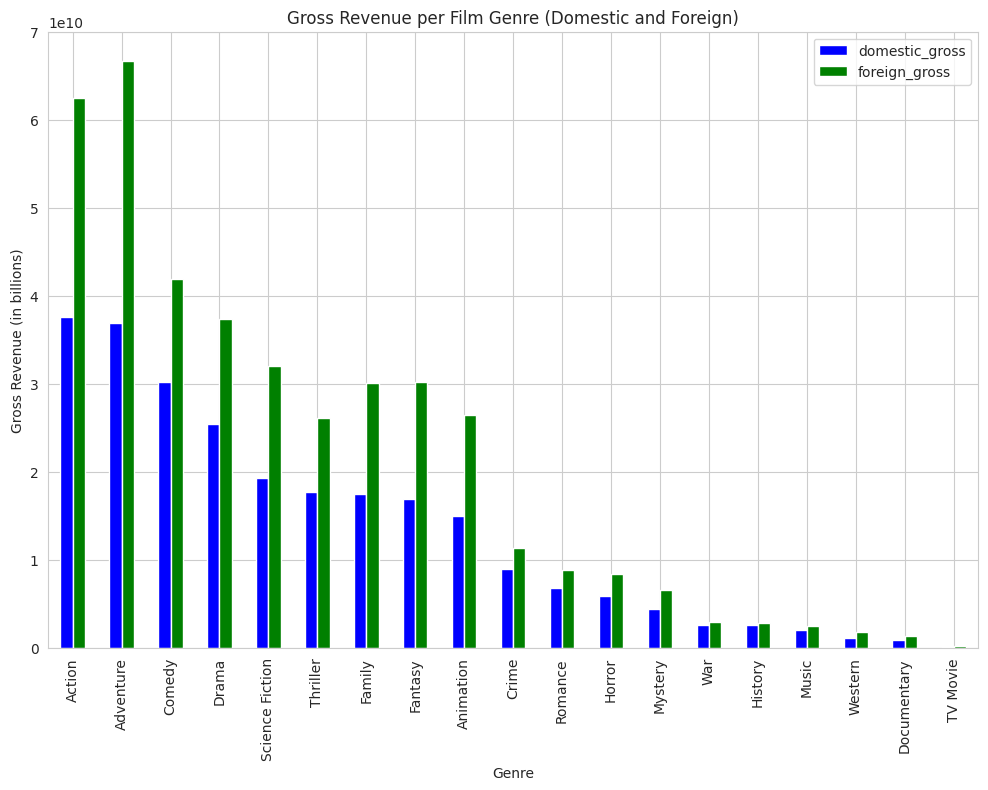

In [24]:
# Explode the decoded_genres column to create separate rows for each genre
exploded_df = merged_df.explode('decoded_genres')

#grouping the data by genre and finding the total of domestic and foreign gross for each genre
gross_revenue_per_genre = exploded_df.groupby('decoded_genres')[['domestic_gross', 'foreign_gross']].sum().sort_values(by='domestic_gross', ascending=False)

#Plotting the data
gross_revenue_per_genre.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'green'])

#Customize appearance
plt.title('Gross Revenue per Film Genre (Domestic and Foreign)')
plt.xlabel('Genre')
plt.ylabel('Gross Revenue (in billions)')
plt.xticks(rotation=90)
plt.show()

The bar plot generated by the code provides a clear visualization of the gross revenue distribution for each genre, both domestically and internationally. By analyzing the plot, you can observe which genres generate the highest revenue in each market and identify any significant differences between domestic and foreign performance. This information is crucial for making informed decisions about genre selection, production strategies, and marketing efforts to maximize a movie's financial success.

Observations and Insights

* Adventure, Action, and Animation: These genres consistently perform well in both domestic and foreign markets. The visuals clearly indicate a significant disparity in foreign compared to domestic gross for these top 3 genres. This suggests substantial opportunities for revenue generation outside of the home market.

* Drama, Comedy, and Thriller: These are genres favored by domestic audiences, contributing the most to overall gross, albeit with a lower ratio of foreign to domestic gross compared to the top 3. The company may need to explore targeted strategies to enhance their appeal in the international market.

* Horror and Science Fiction: Genres where foreign revenue significantly surpasses domestic gross suggests an untapped potential in international markets. It is important to explore distribution strategies and potential cultural elements that could be driving this foreign success.

* Remainder of Genres: The rest of the genres consistently contribute less to the overall gross across both markets, and some genres such as TV movies generate virtually zero revenue internationally. These indicate either niche appeal or a general lack of popularity and should be considered in context when making strategic decisions about film production.

The observations indicate that genre selection significantly influences potential box-office earnings. Studios should focus on genres that are highly marketable internationally, i.e., genres with substantial foreign gross. This will give the company the best chance of maximizing revenue on their film ventures

### Hypothesis Testing

**Research Question:** Is there a significant difference between foreign gross revenue and domestic gross revenue across film genres?

**Null Hypothesis (H₀):** There is no significant difference between the mean foreign gross revenue and mean domestic gross revenue across film genres.

**Alternative Hypothesis (H₁):** There is a significant difference between the mean foreign gross revenue and mean domestic gross revenue across film genres.

**Test to Use:** Paired samples t-test
This test is appropriate because:

- We have two measurements (domestic and foreign gross) for the same subjects (film genres)
- We want to compare the means of these two related groups
- We're testing if the difference between these paired observations is statistically significant

**Implementation Steps:**

- Calculate the difference between foreign and domestic gross for each genre
- Compute the mean and standard deviation of these differences
- Calculate the t-statistic and p-value
- Compare the p-value to your significance level (typically 0.05)
- Make a decision about the null hypothesis

**Interpretation:**

- If p-value < 0.05: Reject the null hypothesis and conclude there is a significant difference
- If p-value ≥ 0.05: Fail to reject the null hypothesis

In [25]:
import scipy.stats as stats

# From your existing dataframe
gross_revenue_per_genre = exploded_df.groupby('decoded_genres')[['domestic_gross', 'foreign_gross']].sum()

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(gross_revenue_per_genre['domestic_gross'],
                                 gross_revenue_per_genre['foreign_gross'])

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Calculate mean difference for interpretation
mean_diff = np.mean(gross_revenue_per_genre['foreign_gross'] - gross_revenue_per_genre['domestic_gross'])
print(f"Mean difference (foreign - domestic): ${mean_diff}")

# Decision
alpha = 0.05
if p_value < alpha:
    print(f"Reject null hypothesis (p={p_value:.4f}). There is a significant difference between foreign and domestic gross revenue.")
else:
    print(f"Fail to reject null hypothesis (p={p_value:.4f}). There is no significant difference between foreign and domestic gross revenue.")

t-statistic: -3.9103
p-value: 0.0010
Mean difference (foreign - domestic): $7789628373.847369
Reject null hypothesis (p=0.0010). There is a significant difference between foreign and domestic gross revenue.


# Objective 3: What are the return-on-investment (ROI) metrics for each genre?

This analysis aims to determine how financially efficient each genre is in terms of return on investment (ROI).

Formula:

𝑅𝑂𝐼=(Worldwide Gross-Production Budget) / Production Budget


This helps identify which genres generate the most return per dollar invested in production.

Code Functionality:

* The code explodes the dataset by genre using explode. This creates separate rows for each genre associated with a movie, allowing for individual analysis of each genre's revenue and budget.

* It aggregates total worldwide gross and total production budget for each genre using groupby and agg. This step calculates the total revenue and total cost for each genre, which are essential for calculating ROI.

* ROI is calculated using the formula mentioned above and stored in a new column named 'ROI' in the genre_roi DataFrame.

* Genres are sorted by ROI in descending order using sort_values, allowing for easy identification of the most profitable genres.

* The results are visualized in a bar plot using seaborn.barplot. This plot displays the ROI for each genre, making it easy to compare the financial performance of different genres.

This metric is critical for strategic financial decisions in film production. By understanding which genres offer the highest ROI, studios can prioritize their investments and allocate resources more effectively to maximize their financial returns.

<ipython-input-26-1584dfa2dd3c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROI', y=top_roi_genres.index, data=top_roi_genres, palette='coolwarm')


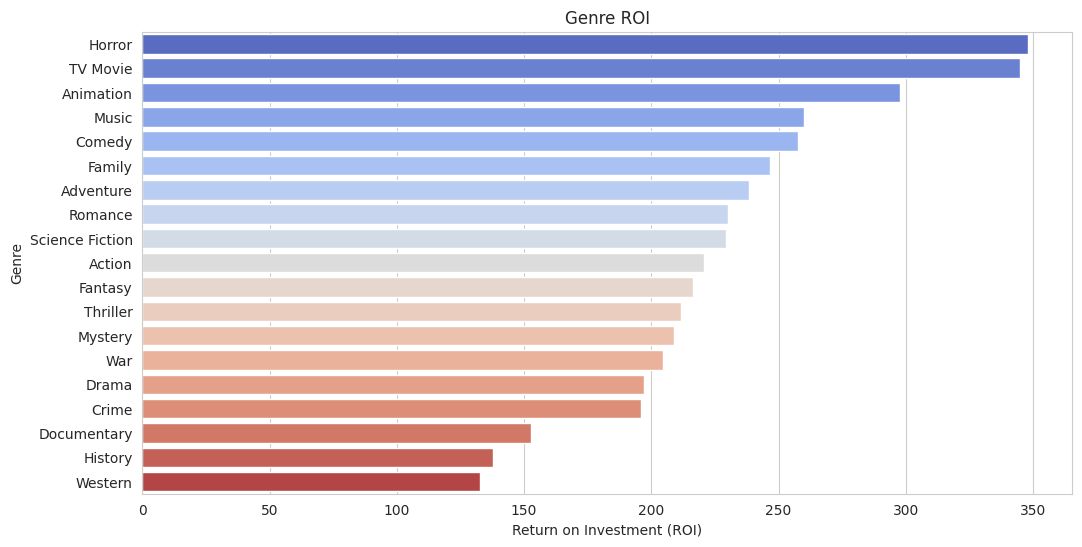

In [26]:
# Calculate total worldwide gross and production budget per genre
genre_roi = merged_df.explode('decoded_genres').groupby('decoded_genres').agg(
    total_worldwide_gross=('worldwide_gross', 'sum'),
    total_production_budget=('production_budget', 'sum')
)

# Calculate ROI per genre
genre_roi['ROI'] = ((genre_roi['total_worldwide_gross'] - genre_roi['total_production_budget']) / genre_roi['total_production_budget'])*100

# Sort genres by ROI in descending order
top_roi_genres = genre_roi.sort_values(by='ROI', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='ROI', y=top_roi_genres.index, data=top_roi_genres, palette='coolwarm')
plt.title('Genre ROI')
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Genre')
plt.show()

Lets output the dataframe in ascending order to confirm if the visuals in the above bar graph are true

In [27]:
top_roi_genres

,total_worldwide_gross,total_production_budget,ROI
decoded_genres,,,
Horror,13386948449,2987507373,348.097587
TV Movie,222383055,50000000,344.766110
Animation,41377138212,10400500000,297.837971
Music,4150945858,1152600000,260.137590
Comedy,70114831180,19610920000,257.529535
Family,47206163616,13611400000,246.813433
Adventure,104846553825,30992400000,238.297627
Romance,14970770935,4535250000,230.098031
Science Fiction,51870785504,15750560000,229.326611


Consider genres such as Horror, which typically have lower production budgets and the potential for high box office returns, leading to higher ROI.

Business Implications:

Understanding genre-specific ROI can guide strategic decisions in film production. By prioritizing genres with a proven track record of high ROI, the company can maximize its potential for financial success and allocate resources more efficiently.

Recommendations:

Focus on genres with high ROI: These genres tend to generate the most return per dollar invested, making them financially attractive for film production.

Diversify strategically: While prioritizing high-ROI genres, consider diversifying production across a range of genres to mitigate financial risks associated with market fluctuations or changing audience preferences.

Balance ROI with creative vision: While ROI is a crucial factor, it's also important to consider the company's overall creative vision and target audience when making production decisions. Balancing financial considerations with artistic goals is essential for long-term success in the film industry.

### Hypothesis testing

Test Of Hypothesis at 5% significance level.

Null Hypothesis (H₀): There is no difference in mean ROI between movie genres

Alternative Hypothesis (H₁): At least one genre has a different mean ROI

Alpha = 0.05

Test to Use: ANOVA
Why?  Perfect Match for the Research Question
* Your goal: Compare ROI across multiple movie genres (>2 groups)

* ANOVA's purpose: Test whether any significant differences exist between ≥2 group means

In [28]:
# testing hypothesis
# Calculate ROI per movie first
merged_df['ROI'] = ((merged_df['worldwide_gross'] - merged_df['production_budget']) /
                    merged_df['production_budget']) * 100

# Explode genres for individual movie-genre pairs
genre_exploded = merged_df.explode('decoded_genres')

# Get top genres by average ROI (not aggregated totals)
top_genres = (genre_exploded.groupby('decoded_genres')['ROI']
              .mean()
              .sort_values(ascending=False)
              .index[:10])  # Top 10 genres by mean ROI

# Filter data for these top genres
filtered_data = genre_exploded[genre_exploded['decoded_genres'].isin(top_genres)]

# Prepare data for ANOVA - create a list of ROI arrays for each genre
groups = [group['ROI'].values
          for name, group in filtered_data.groupby('decoded_genres')]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print("ANOVA Results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.3g}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print(f"\nReject the null hypothesis ({p_value} < {alpha}) - Significant ROI differences exist between genres.")


else:
    print(f"\nFail to reject the null hypothesis ({p_value} ≥ {alpha}) - No significant ROI differences found.")

ANOVA Results:
F-statistic: 4.797
P-value: 2.43e-06

Reject the null hypothesis (2.4288548100278288e-06 < 0.05) - Significant ROI differences exist between genres.


**Findings**

Our F = 4.797, which is quite large, indicating strong evidence of a difference among the group means and

Our P value = 2.43e-06, which is 0.0000000243 — extremely small — meaning that we have to reject our null hypothesis.

Our Alpha is 0.05

**Conclusion on our objective:**

We conclude that there are statistically significant differences at 5% level of significance between at least some of the group(genre) means.

You should reject the null hypothesis.

# Objective 4: Release Date Patterns

It shows how movie's release month affect the worldwide  gross earnings.

Also highlights the seasonality of movie revenue.

This analysis investigates the relationship between a movie's release month and its worldwide gross earnings. It aims to identify any patterns or trends that might indicate optimal release timing for maximizing box office success.

Purpose:

Understanding release date patterns is crucial for strategic planning in the film industry. By identifying months or seasons that tend to generate higher box office revenue, studios can make informed decisions about when to release their films to maximize their potential for financial success. This analysis can also provide insights into audience behavior and preferences, helping studios to better understand when audiences are most likely to go to the movies.

Code Functionality:

* The code extracts the release month from the 'release_date_x' column using the dt.month attribute and stores it in a new column named 'release_month'.

* It groups the data by 'release_month' and calculates the total worldwide gross for each month using groupby and sum.

* The results are visualized in a bar plot using seaborn.barplot, with release month on the x-axis and total worldwide gross on the y-axis.

<ipython-input-29-e5348935eab5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='release_month', y='worldwide_gross', data=monthly_gross, palette='Spectral')


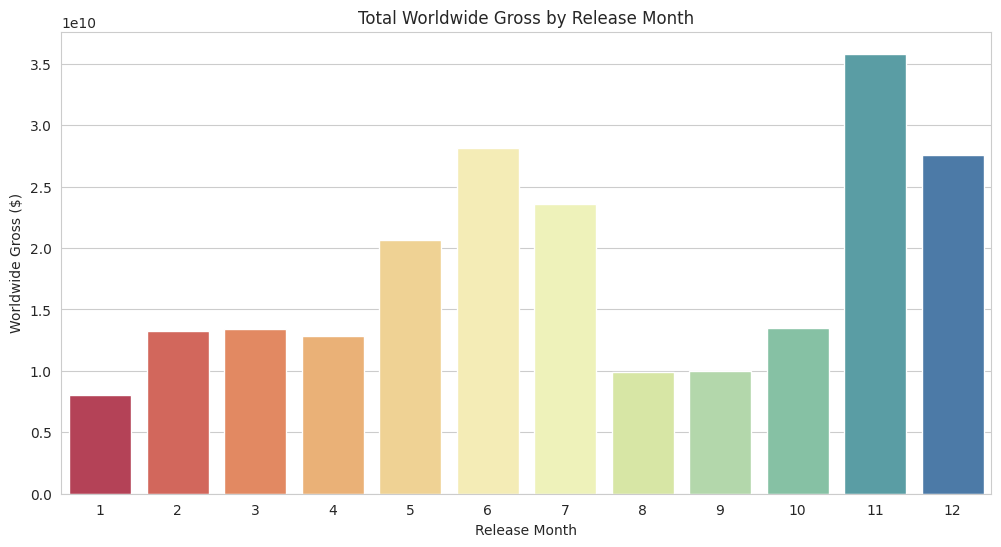

In [29]:
# Extracting the month from the release date
merged_df['release_month'] = merged_df['release_date_x'].dt.month
monthly_gross = merged_df.groupby('release_month')['worldwide_gross'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='release_month', y='worldwide_gross', data=monthly_gross, palette='Spectral')
plt.title('Total Worldwide Gross by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Gross ($)')
plt.show()

The bar plot reveals noticeable patterns in worldwide gross earnings based on the release month.

You might observe that certain months, such as those coinciding with summer or holiday seasons, tend to generate higher box office revenue.
This could be due to factors such as increased leisure time, school breaks, and the release of highly anticipated blockbuster films during these periods.

Business Implications:

The insights gained from this analysis can guide strategic decisions regarding the timing of movie releases. Studios can leverage this information to optimize their release schedules and maximize the potential for box office success.

Recommendations:

* Consider releasing films during peak movie-going periods: Months associated with higher worldwide gross earnings, such as summer or holiday seasons, might be ideal for releasing films with broad appeal.

* Tailor release strategies based on genre and target audience: Certain genres or target audiences might have different preferences for release timing. Studios should consider these factors when making release decisions.

* Monitor market trends and competitor releases: The movie landscape is constantly evolving, and release date patterns can shift over time. Studios should stay informed about market trends and competitor releases to adjust their strategies accordingly.

* Continuously analyze and refine release timing: The insights gained from this analysis are valuable, but studios should continue to track and analyze release date performance to optimize their strategies over time.

By understanding and leveraging release date patterns, studios can make data-driven decisions that increase the likelihood of box office success.

### Hypothesis testing

This cell performs a One-Way ANOVA test to evaluate whether the release month of a movie significantly impacts its worldwide gross revenue.

Hypotheses:
Null Hypothesis (H₀): There is no significant difference in average worldwide gross across different release months.

Alternative Hypothesis (H₁): At least one release month has a significantly different average worldwide gross.

Interpretation of Results:

F-Statistic: Indicates the ratio of between-group variance to within-group variance.

P-Value: If p < 0.05, we reject the null hypothesis.

This test helps determine if certain months (e.g., summer or holiday seasons) are more lucrative for movie releases in terms of global earnings.

In [30]:
# Drop missing values to avoid errors in ANOVA
anova_df = merged_df[['release_month', 'worldwide_gross']].dropna()

# Create a list of worldwide_gross values per month
grouped_data = [anova_df[anova_df['release_month'] == month]['worldwide_gross']
                for month in range(1, 13)]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*grouped_data)

print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")


F-statistic: 9.15
P-value: 0.0000


Test Results: Impact of Release Month on Worldwide Gross

F-Statistic: 9.15

P-Value: 5.86 × 10⁻¹⁶

Interpretation:
Since the p-value is far below 0.05, we reject the null hypothesis.

Conclusion:
There is strong statistical evidence that the release month significantly impacts a movie's worldwide gross.

This aligns with industry expectations, as:

Summer (June–August) and Holiday (November–December) releases often see higher earnings due to increased movie-going activity.

Strategic release timing can be a key factor in a film's global financial success.



# Objective 5: Average Rating Per Genre

 This section aims to determine the average rating for each movie genre, leveraging data from average votes. Understanding audience preferences is crucial for identifying genres that resonate with viewers and have the potential for positive word-of-mouth. By visualizing the average ratings, we can gain insights into which genres tend to be better received by audiences, which can be a valuable factor in shaping production strategies.


decoded_genres
History            6.897059
War                6.796970
Documentary        6.754167
Western            6.666667
Drama              6.660811
Animation          6.548980
Romance            6.520588
Adventure          6.454478
Music              6.447368
Crime              6.436667
Science Fiction    6.432515
Family             6.419463
Comedy             6.300662
Fantasy            6.285430
Action             6.282621
Mystery            6.262264
Thriller           6.222764
Horror             5.821192
TV Movie           5.600000
Name: vote_average, dtype: float64


<ipython-input-31-80ea72a12f1d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_per_genre.index, y=average_rating_per_genre.values, palette='viridis')


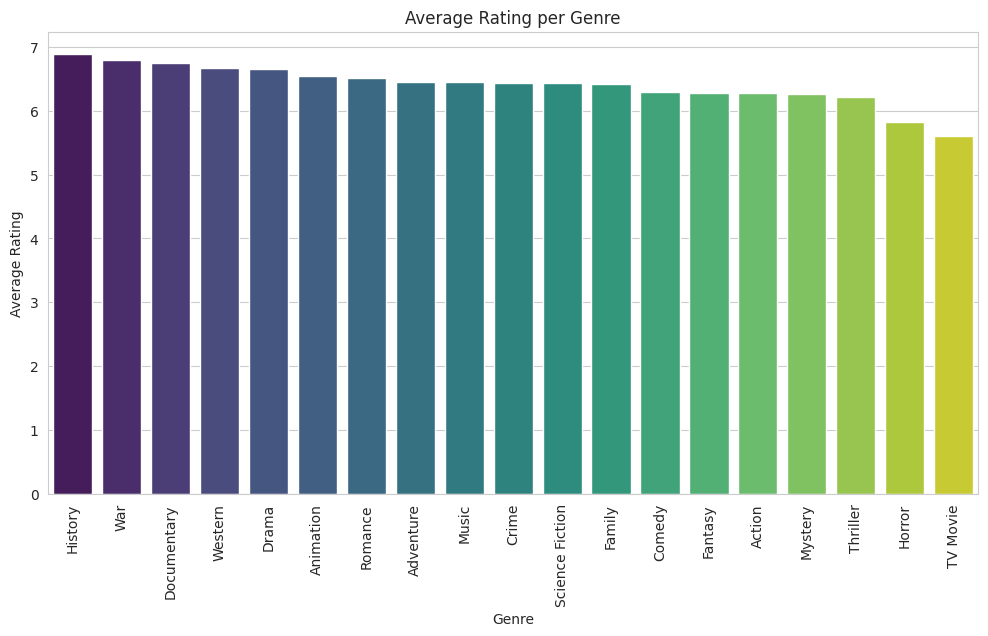

In [31]:
# Explode the decoded_genres column to create separate rows for each genre
exploded_df = merged_df.explode('decoded_genres')

# Calculate average rating per genre
average_rating_per_genre = exploded_df.groupby('decoded_genres')['vote_average'].mean().sort_values(ascending=False)

# Print the result
print(average_rating_per_genre)

# Create a bar plot to visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=average_rating_per_genre.index, y=average_rating_per_genre.values, palette='viridis')
plt.title('Average Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

**Observations and Insights:**

The bar plot above provides a clear visualization of the average rating for each movie genre. We can observe that certain genres, such as Documentary and History, tend to receive higher average ratings compared to others, such as Horror or TV Movie. This difference in average ratings could be attributed to various factors, including audience preferences, storytelling styles, and overall production quality.

**Business Implications:**

These findings have significant implications for the company's new movie studio. Genres with consistently high average ratings suggest a greater likelihood of positive audience reception and potential critical acclaim. This information can be used to inform strategic decisions in content creation, such as prioritizing genres with a strong track record of audience satisfaction. While higher ratings may not directly translate to higher box office revenue, they serve as a valuable indicator of overall quality and viewer appeal, which can contribute to long-term success in the film industry.

### Hypothesis Testing

Hypothesis Test 1: Average Rating Differences Across Genres
Objective: Test whether average ratings significantly differ across genres.

Define Hypotheses

Null Hypothesis (H₀): There is no significant difference in average movie ratings across genres.

Alternative Hypothesis (H₁): There is a significant difference in average movie ratings across genres.

Test Chosen: One-Way ANOVA.

This is appropriate because:

* We're comparing means across multiple independent groups (genres).

* ANOVA is designed to test for differences between the means of three or more groups.

In [33]:
genre_rating_groups = [group['vote_average'].values for name, group in exploded_df.groupby('decoded_genres')]

# Perform one-way ANOVA
anova_result = f_oneway(*genre_rating_groups)

# Print results
print(f"F-statistic: {anova_result.statistic:.2f}")
print(f"P-value: {anova_result.pvalue:.4f}")

F-statistic: 13.06
P-value: 0.0000


Hypothesis Testing Results

One-Way ANOVA – Rating Differences Across Genres

F-Statistic: 13.06

P-Value: 2.42 × 10⁻³⁸

Conclusion: Since the p-value is far below 0.05, we reject the null hypothesis.

Implication: There are statistically significant differences in average movie ratings across different genres.

# Objective 6: Trend of Movie Production Across Genres Over Time

This code cell aims to visualize the trend of movie production across different genres over the years. It seeks to answer the question: **How has the volume of films produced per genre evolved over time?**

**Purpose:**

By understanding these trends, the company can gain a better understanding of the evolving landscape of the film industry and potentially identify emerging opportunities or declining genres. This analysis is crucial for strategic decision-making in the movie industry, as it helps to:

* **Identify consistently popular genres:** Recognizing genres that have maintained a strong presence over the years can inform production decisions, allowing studios to focus on areas with proven audience appeal.
* **Spot emerging trends:** Identifying genres experiencing an increase in production volume can indicate growing audience interest and potential areas for investment.
* **Recognize declining genres:** Recognizing genres with decreasing production volume can signal a potential shift in audience preferences or market saturation, prompting studios to adapt their strategies.
* **Make data-driven decisions:** By visualizing the historical production trends, studios can make informed choices about which genres to prioritize for future projects, maximizing the potential for success.

**Code Functionality:**

This code cell uses data from the merged movie dataset to:

1. **Calculate the number of movies produced for each genre in each year.**
2. **Plot this data as a line graph, with each genre represented by a different colored line.**
3. **Label each line for clear identification of genres.**

The resulting visualization will illustrate the production trends of various movie genres over time, providing valuable insights for strategic planning and decision-making within the movie industry.

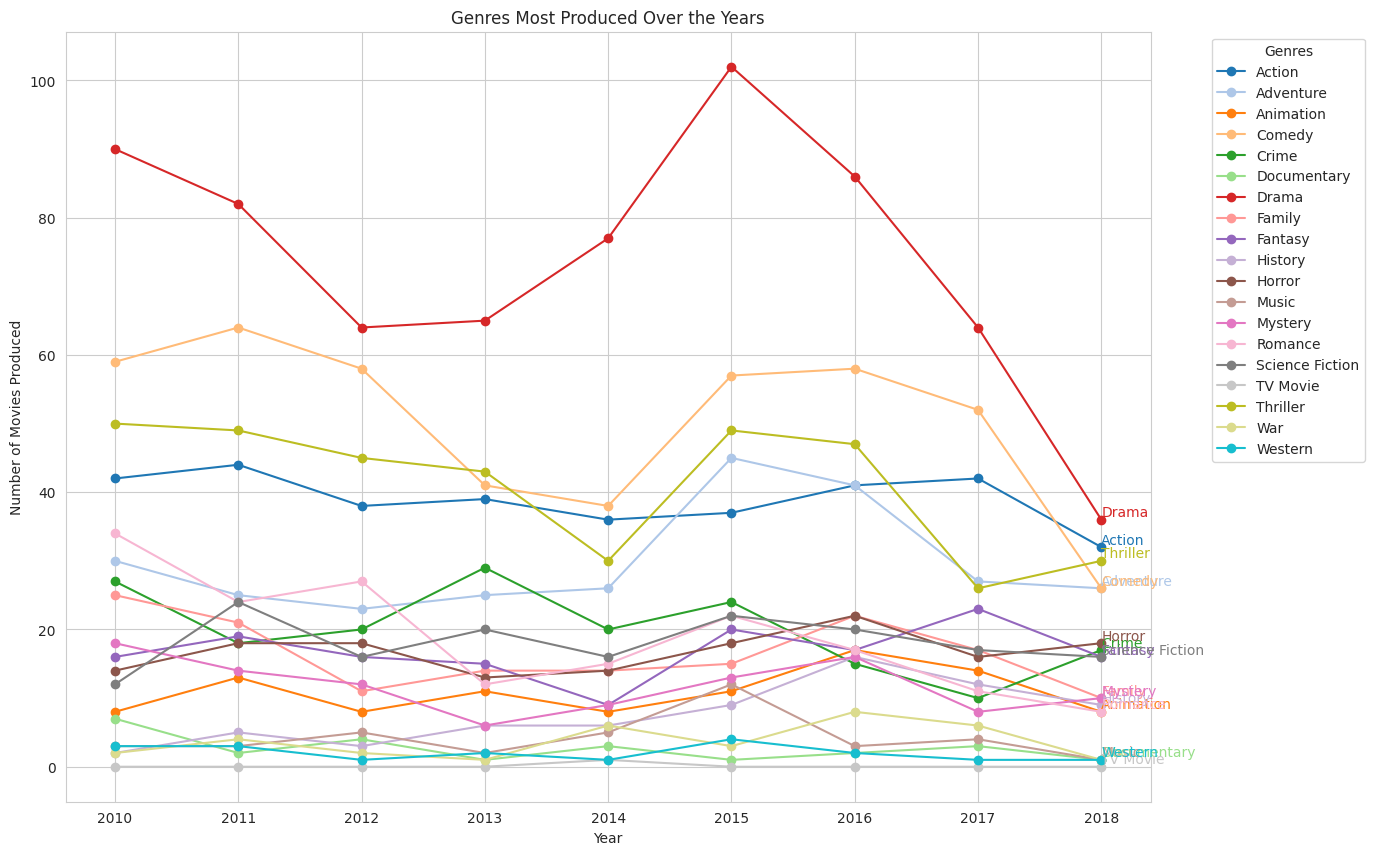

In [34]:
# Calculate the number of movies produced per genre per year
genres_count = merged_df.explode('decoded_genres').groupby(['year', 'decoded_genres']).size().unstack().fillna(0)
# Define a colormap with a wide range of distinct colors
colormap = plt.get_cmap('tab20')
# Plot the line graph with distinct colors
plt.figure(figsize=(14, 10))
for i, genre in enumerate(genres_count.columns):
    plt.plot(genres_count.index, genres_count[genre], marker='o', color=colormap(i / len(genres_count.columns)), label=genre)
# Label the end of each line
    plt.text(genres_count.index[-1], genres_count[genre].iloc[-1], genre,
             color=colormap(i / len(genres_count.columns)),
             verticalalignment='bottom', horizontalalignment='left')

plt.title('Genres Most Produced Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies Produced')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

The line graph generated by this code provides insights into the evolution of movie genre production over time. Some key observations from the graph are:
* **Drama movies have consistently been the most produced type over the years.**
* **Comedy movies have also maintained a strong and consistent presence over the years, though their popularity dropped in 2019 and 2020.**
* **Horror movie production has increased with an almost constant rate since 2013, having reached a peak in 2016, suggesting a potential growing demand.**
* **Adventure movies have seen a slight increase in production since 2013, suggesting their popularity and financial success might be influencing more films in this genre.**
* **Thriller movie production has had a slight peak from 2015 to 2017, but overall maintains a relatively constant rate of production.**
* **Action movies have started to increase in popularity over the last few years (2015-2019)**
* **The genres that have remained relatively flat over the last 10 years are mystery, science fiction, war, western, crime, fantasy, romance, animation, music, family, and history.**
* **Documentary shows a downward trend in movie production. This is likely due to the increase in documentaries being produced by video streaming services as opposed to movie theaters.**
* **TV movie production seems to have been on the decline, especially over the last 5 years. This is most likely because television programs are being funded more through video streaming services. TV movies likely are not being considered high revenue generating content by movie production companies.**

The analysis can help you identify opportunities in specific niches within a genre. By analyzing the pattern of production of the different genres, you can make data-driven decisions about which movie genres to prioritize.

### Hypothesis Testing

Objective: Determine if production frequency for top genres significantly varies over time.

Hypotheses:

Null Hypothesis (H₀): The number of movies produced in each genre does not vary significantly by year.

Alternative Hypothesis (H₁): The number of movies produced in each genre does vary significantly by year.

Test Chosen: Chi-Square Test of Independence

Rationale for Test Choice:

The Chi-Square Test of Independence is used for testing the association between two categorical variables. In this case, the variables are:

* Genre (categorical)

* Year (categorical, treated as categories rather than continuous values)

The test assesses whether there's a statistically significant relationship between these two variables. If there is, it suggests that genre production trends are not independent of the year and do vary over time.

In [37]:
from scipy.stats import chi2_contingency

# Convert 'decoded_genres' into a format suitable for crosstab
genre_exploded = merged_df.explode('decoded_genres')

# Create a contingency table (genre x year)
contingency_table = pd.crosstab(genre_exploded['year'], genre_exploded['decoded_genres'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")

Chi-Square Statistic: 181.20
P-value: 0.0194


Chi-Square Test – Genre Production Over Years

Chi² Statistic: 181.20

P-Value: 0.0194

Conclusion: Since p-value is < 0.05, we reject the null hypothesis.

Implication: There is a statistically significant relationship between genres and the years, meaning that genre production trends do vary significantly across time.

# Linear Regression

## Predicting Worldwide Gross Revenue using Linear Regression

This section aims to build a linear regression model to predict a movie's worldwide gross revenue based on its release year and genre.

**Methodology:**

1. **Data Preparation:**
    * Explode the 'decoded_genres' column to handle movies with multiple genres.
    * One-hot encode the 'decoded_genres' column to represent genres numerically. We use one-hot encoding for genres because linear regression works best with numerical data. It creates a separate binary column for each genre, representing its presence or absence in a movie.
    * Create feature matrix (X) including 'year' and encoded genres, and target vector (y) representing 'worldwide_gross'.
2. **Train-Test Split:**
    * Splitting the data into training and testing sets allows us to evaluate the model's performance on unseen data and helps prevent overfitting.
3. **Model Training:**
    * The LinearRegression class is used to train the model. It learns the relationship between the independent and dependent variables based on the training data.
4. **Prediction:**
    * Use the trained model to predict worldwide gross revenue for the testing set.
5. **Evaluation:**
    * Mean_squared_error and r2_score are common metrics used to evaluate the model's performance. Lower MSE and higher R-squared indicate a better fit.

**Rationale:**

Linear regression is a suitable choice for this task as it assumes a linear relationship between the independent variables (year, genre) and the dependent variable (worldwide gross). While this assumption may not be perfectly accurate, it provides a good starting point for predicting movie revenue.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Explode 'decoded_genres' to create separate rows for each genre per movie
exploded_df = merged_df.explode('decoded_genres')

# One-hot encode the 'decoded_genres' column
encoded_genres = pd.get_dummies(exploded_df['decoded_genres'], prefix='genre')

# Concatenate encoded genres back to the DataFrame
data = pd.concat([exploded_df[['year', 'worldwide_gross']], encoded_genres], axis=1)

# Create Feature Matrix (X) and Target Vector (y)
X = data[['year'] + list(encoded_genres.columns)]
y = data['worldwide_gross']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5.041063630777244e+16
R-squared: 0.17028665698784962


## Model Evaluation: Linear Regression

**Mean Squared Error (MSE):** 5.04e+16

**R-squared:** 0.17

**Interpretation:**

* **Mean Squared Error (MSE):** Represents the average squared difference between predicted and actual worldwide gross values. A lower MSE indicates better model performance.
* **R-squared:** Measures the proportion of variance in the dependent variable explained by the independent variables. A higher R-squared (closer to 1) suggests a better fit of the model to the data.

The linear regression model exhibits a high Mean Squared Error (MSE) and a low R-squared value. This indicates that the model's predictions deviate significantly from the actual values and that the chosen predictor variables explain only approximately 17% of the variance in the target variable.

**Implications:**

The model's performance suggests that it may not be a good fit for the data or that important factors influencing the target variable are missing from the model. Further investigation is needed to improve the model's predictive power. This could involve exploring additional predictor variables, considering non-linear relationships, or using a different modeling approach.

**Limitations and Considerations:**

* **Linearity Assumption:** Linear regression assumes a linear relationship between features and target, which might not always be true for complex movie revenue dynamics.

**Recommendations:**

- Feature Engineering: Explore adding relevant features to the model to improve its predictive capabilities.
- Data Transformations: Consider applying data transformations to improve model fit.
- Alternative Models: If linear regression is not a suitable fit, consider other regression techniques.
- Model Refinement: Focus on iterative model development to identify areas for improvement.
- Data Size: A larger and more diverse dataset might lead to a more robust and generalizable model.
- Evaluate the model's performance on different subsets of the data (e.g., specific genres, time periods) to understand its limitations and strengths.


# Key Findings

1. **Top Grossing Genres**:
   - **Action**, **Adventure**, and **Science Fiction** consistently generate the highest **worldwide gross**.
   - Foreign markets significantly outperform domestic markets, especially for blockbuster genres.

2. **ROI by Genre**:
   - **Horror**, **Thriller**, and **Comedy** show the **highest return on investment (ROI)**, often due to lower budgets and high audience engagement.
   - ROI analysis confirms that profitability is not solely tied to high gross.

3. **ANOVA: Genre vs Worldwide Gross**:
   - Statistically significant differences in gross earnings were found across genres.
   - Supports the strategy of genre-specific revenue forecasting.

4. **Paired t-test: Foreign vs Domestic Revenue**:
   - Foreign markets outperform domestic with a **statistically significant mean difference**.
   - Highlights the importance of designing films with global appeal.

5. **ANOVA: ROI Differences by Genre**:
   - Clear ROI disparities exist across genres, with low-budget genres often yielding higher relative profits.

6. **ANOVA: Release Month vs Gross**:
   - Gross revenues differ significantly by release month.
   - **Summer months (May–July)** deliver the highest global revenue, followed by holiday season releases (Nov–Dec).

7. **Genre Ratings Analysis (ANOVA)**:
   - **Drama**, **Documentary**, and **History** genres receive the highest **average ratings**, indicating a divide between critical acclaim and commercial success.

8. **Chi-Square Test & Time Series Analysis: Trends in Movie Production by Genre**:
   - Significant year-over-year **variation in production volume across genres**.
   - Trends show:
     - Rising production of **Documentaries** and **Horror** in recent years.
     - Decline in **Western** and **War** genres.
     - **Comedy** and **Action** have remained consistently popular.
   - Statistical testing confirms these trends are **not random**, but systematically influenced by industry and audience dynamics.

9. **Linear Regression (Genre + Year → Gross)**:
   - Regression model using genre and release year explains a **low amount**(~17%) of the variance in gross revenue.
   - While informative, the model’s R² indicates that additional features (like cast, marketing spend, and ratings) are needed for robust forecasting.

# Conclusions

- **Genre plays a critical role** in determining both box office revenue and ROI.
- **Summer and holiday releases** tend to generate the highest revenues.
- **Foreign markets significantly boost earnings**, emphasizing the importance of international appeal.
- **Profitability (ROI)** does not always align with total earnings — low-budget genres often yield higher efficiency.
- **Basic predictive models** need more sophisticated features for better accuracy.


# Summary

This project merged and analyzed three major movie industry datasets to understand factors driving profitability. The study involved data cleaning, merging, statistical hypothesis testing (ANOVA, t-tests, chi-square), ROI computation, and regression modeling. It successfully highlighted the importance of genre, budget efficiency, and seasonal release trends in maximizing movie success.


# Recommendations

1. **Invest in Genres with High ROI**: Especially Horror, Thriller, and Comedy.
2. **Strategically Time Releases**: Focus on Summer and Winter holiday periods for major launches.
3. **Expand Predictive Features**: Include more variables like cast, marketing budget, and critic scores in future models.
4. **Tailor International Strategies**: Consider foreign audience preferences during production and marketing planning.
5. **Balance Gross vs ROI**: Avoid focusing solely on gross earnings; budget efficiency is equally crucial.
